In [83]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from ssl_wafermap.utilities.plotting import (
    ax_thiccify,
    init_seaborn_style,
    legend_thiccify,
    matplotlibify,
)

init_seaborn_style()

# Ignore warning about using plotly palettes in seaborn
warnings.filterwarnings("ignore", message=".*palette list.*")

In [11]:
f1_df = pd.read_pickle("../data/processed/model_logs/knn_f1.pkl.xz")
f1_df

,Step,BarlowTwins,BYOL,DCLW,DINO,DINOViT,FastSiam,MAE,MoCo,MSN,PMSN,SimCLR,SimMIM,SimSiam,SwAV,VICReg
0,582,0.664303,0.676589,0.682793,0.647736,0.548437,0.689543,0.672414,0.672345,0.677395,0.672357,0.637101,0.541427,0.692066,0.694217,0.674460
1,1165,0.674820,0.689879,0.696568,0.630180,0.625561,0.704119,0.694765,0.671964,0.671574,0.675053,0.653190,0.379345,0.685302,0.691552,0.668727
2,1748,0.672163,0.699007,0.700884,0.638287,0.639324,0.703866,0.705122,0.668504,0.676618,0.679115,0.641243,0.264940,0.694916,0.695606,0.668974
3,2331,0.658473,0.694995,0.697046,0.657550,0.627706,0.711770,0.693681,0.669316,0.680232,0.676112,0.654860,0.218276,0.700598,0.701678,0.667203
4,2914,0.626624,0.699843,0.710931,0.667760,0.638100,0.724824,0.687401,0.666977,0.677487,0.682364,0.667097,0.165680,0.704548,0.703210,0.667496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,85117,0.737010,0.762539,0.738028,0.690620,0.702110,0.311851,0.696999,0.744852,0.724486,0.715733,0.675204,0.149287,0.310405,0.739527,0.723906
146,85700,0.738142,0.764986,0.733818,0.687040,0.704474,0.348756,0.699820,0.742176,0.721437,0.714527,0.667721,0.153417,0.325702,0.736798,0.725816
147,86283,0.740005,0.764691,0.739749,0.689719,0.702123,0.325133,0.699434,0.745179,0.724588,0.716628,0.677755,0.162155,0.324022,0.737924,0.725243
148,86866,0.740462,0.767234,0.735017,0.688676,0.702837,0.332919,0.699165,0.747012,0.721705,0.717724,0.679199,0.159306,0.300664,0.737152,0.724466


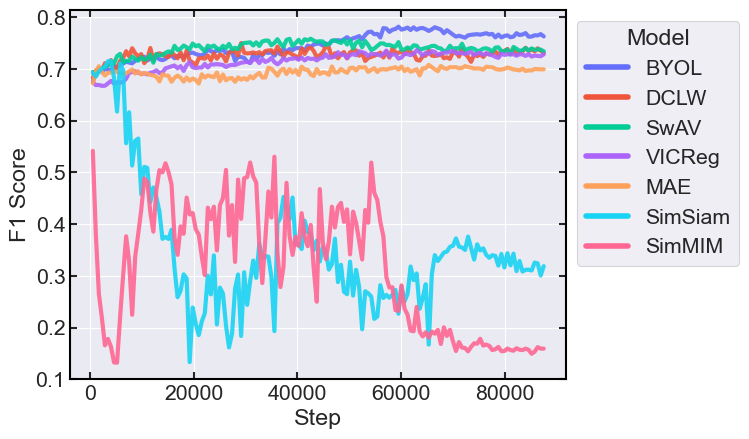

In [30]:
plot_columns = ["Step", "BYOL", "DCLW", "SwAV", "VICReg", "MAE", "SimSiam", "SimMIM"]
# plot_columns = ["Step", "DCLW", "SwAV", "BYOL", "VICReg", "MAE", "SimSiam", "SimMIM"]

plot_df = pd.melt(
    f1_df[plot_columns], id_vars="Step", var_name="Model", value_name="F1 Score"
)

fig, ax = plt.subplots()
ax_thiccify(ax)
sns.lineplot(
    data=plot_df,
    x="Step",
    y="F1 Score",
    hue="Model",
    lw=3,
    alpha=0.9,
    legend="full",
    ax=ax,
    palette=px.colors.qualitative.Plotly,
)
legend_thiccify(ax, legend_title="Model")
# plt.savefig("../reports/figures/knn_f1_seaborn.png", dpi=300, bbox_inches="tight")
plt.show()

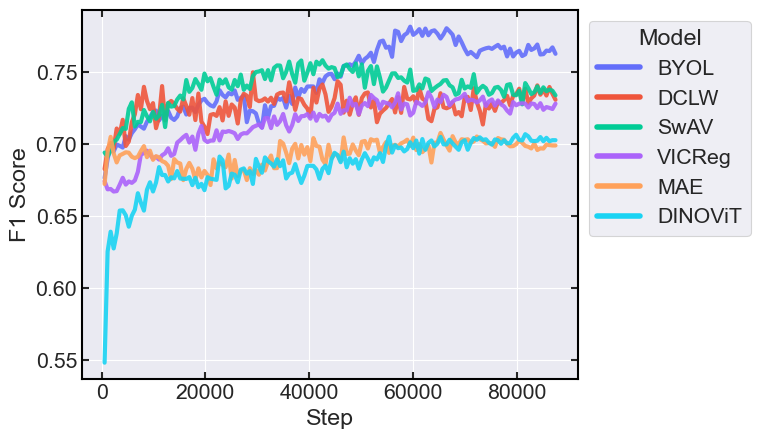

In [33]:
plot_columns = ["Step", "BYOL", "DCLW", "SwAV", "VICReg", "MAE", "DINOViT",]
# plot_columns = ["Step", "DCLW", "SwAV", "BYOL", "VICReg", "MAE", "SimSiam", "SimMIM"]

plot_df = pd.melt(
    f1_df[plot_columns], id_vars="Step", var_name="Model", value_name="F1 Score"
)

fig, ax = plt.subplots()
ax_thiccify(ax)
sns.lineplot(
    data=plot_df,
    x="Step",
    y="F1 Score",
    hue="Model",
    lw=3,
    alpha=0.9,
    legend="full",
    ax=ax,
    palette=px.colors.qualitative.Plotly,
)
legend_thiccify(ax, legend_title="Model")
# plt.savefig("../reports/figures/knn_f1_seaborn.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
fig = px.line(
    plot_df,
    x="Step",
    y="F1 Score",
    color="Model",
    width=700,
    height=400,
    color_discrete_sequence=px.colors.qualitative.Plotly,
)
fig.update_traces(line_width=4, opacity=0.9)
fig, scale = matplotlibify(fig, font_size=20)
# fig.write_image("../reports/figures/knn_f1_plotly.png", scale=3)
fig.show()

## Confusion Matrices

In [84]:
sns.set_theme(style="white")
os.makedirs("../reports/figures/confusion_matrix", exist_ok=True)

In [ ]:
labels = [
    "Center",
    "Donut",
    "Edge-Loc",
    "Edge-Ring",
    "Loc",
    "Near-full",
    "Random",
    "Scratch",
    "None",
]

for root, dirs, files in os.walk("../models/new_knn"):
    for file in files:
        if file.endswith(".npz"):
            name = root.split("\\")[-1]
            print(name)
            print(os.path.join(root, file))
            conf_matrices = np.load(os.path.join(root, file))['confusion_matrix']
            # print(conf_matrices.shape)

            fig, ax = plt.subplots(figsize=(8, 6))
            sns.heatmap(
                conf_matrices[-1],
                annot=True,
                cmap=sns.cubehelix_palette(start=0, light=0.97, as_cmap=True),
                # cmap="Blues",
                square=True,
                linewidths=1,
                fmt=".2f",
                xticklabels=labels,
                yticklabels=labels,
                ax=ax,
                vmax=1,
                vmin=0,
            )
            plt.xticks(rotation=45)
            # plt.yticks(rotation=45)
            ax.set_xlabel("Predicted Label", fontsize=14)
            ax.set_ylabel("True Label", fontsize=14)
            plt.savefig(f"../reports/figures/confusion_matrix/{name}.png", dpi=300, bbox_inches="tight")
            plt.show()

        else:
            break

## Code Graveyard 💀🪦

Conclusions:
- Use Arial font for consistency with matplotlib
- Seaborn template is nice
- px.colors.qualitative.D3 is a nice alternative to px.colors.qualitative.Plotly
- figure size scaling is much harder in plotly than with seaborn

In [5]:
# import plotly.express as px

# plot_df = pd.melt(f1_df[plot_columns], id_vars=["Step"], var_name="Model", value_name="F1 Score")
# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.Plotly,
# )
# # set all margins except left to 0
# fig.update_layout(margin=dict(r=0, t=0, b=0), font_size=20, font_family="Dejavu Sans", template="seaborn")
# fig.update_traces(line_width=4, opacity=0.9)
# fig.write_image("fig.png", scale=3)
# fig.show()

# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.D3)
# # set all margins except left to 0
# fig.update_layout(margin=dict(r=0, t=0, b=0), font_size=20, font_family="Arial", template="seaborn")
# fig.update_traces(line_width=4, opacity=0.9)
# fig.write_image("fig1.png", scale=3)
# fig.show()

In [ ]:
# def merge_dfs(source_path, save_path=None):
#     """Merge all csv files in a directory into one dataframe"""
#     all_dfs = []
#     for file in os.listdir(source_path):
#         df = pd.read_csv(os.path.join(source_path, file))

#         # File name format: run-BYOL-tag-knn_accuracy.csv
#         model_name = file.split("-")[1]
#         # Some spelling mistakes:
#         if model_name == "Moco":
#             model_name = "MoCo"
#         elif model_name == "SwaV":
#             model_name = "SwAV"
#         elif model_name == "MAE":
#             continue # We only want MAE2
#         elif model_name == "MAE2":
#             model_name = "MAE"

#         # We don't care about the wall time column
#         df.drop(columns=["Wall time"], inplace=True)
        
#         # Rename the value column to the model name
#         df.rename(columns={"Value": model_name}, inplace=True)
#         all_dfs.append(df)
    
#     # Merge all dataframes into one
#     # First, merge the first two dataframes
#     merged_df = pd.merge(all_dfs[0], all_dfs[1], on=["Step"], how="left")
#     # Then, merge the rest of the dataframes
#     for df in all_dfs[2:]:
#         merged_df = pd.merge(merged_df, df, on=["Step"], how="left")

#     # In case of row count mismatch, interpolate missing values
#     merged_df.interpolate(method="linear", inplace=True)

#     # Save to file. As a sanity check, confirm read-file is the same.
#     if save_path is not None:
#         merged_df.to_pickle(f"{save_path}.pkl.xz", compression="xz")
#     read_df = pd.read_pickle(f"{save_path}.pkl.xz")
#     assert merged_df.equals(read_df), "Saved and read df are not the same!"

#     return merged_df


# root_dir = "../data/interim/model_logs/"
# save_dir = "../data/processed/model_logs/"

# f"{root_dir}/accuracy"

# accuracy_df = merge_dfs(
#     os.path.join(root_dir, "accuracy"),# save_path=os.path.join(save_dir, "knn_accuracy")
# )
# f1_df = merge_dfs(
#     os.path.join(root_dir, "f1"),# save_path=os.path.join(save_dir, "knn_f1")
# )
# loss_df = merge_dfs(
#     os.path.join(root_dir, "loss"),# save_path=os.path.join(save_dir, "knn_loss")
# )
# rep_std_df = merge_dfs(
#     os.path.join(root_dir, "rep_std"),# save_path=os.path.join(save_dir, "knn_rep_std")
# )

In [6]:
# plot_df = pd.melt(f1_df[plot_columns], id_vars=["Step"], var_name="Model", value_name="F1 Score")
# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.Plotly,
# )
# # set all margins except left to 0
# fig.update_layout(margin=dict(r=0, t=0, b=0), font_size=20, font_family="DejaVu Sans")
# fig.update_traces(line_width=4, opacity=0.9)
# # fig, scale = matplotlibify(fig)
# fig.write_image("fig5.png", scale=2.5)
# fig.show()

# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.Plotly,
# )
# # set all margins except left to 0
# fig.update_traces(line_width=4, opacity=0.9)
# fig.update_layout(template="seaborn")
# fig, scale = matplotlibify(fig)
# fig.write_image("fig3.png", scale=scale)
# fig.show()

# fig = px.line(
#     plot_df,
#     x="Step",
#     y="F1 Score",
#     color="Model",
#     width=700,
#     height=400,
#     color_discrete_sequence=px.colors.qualitative.Plotly,
# )
# # set all margins except left to 0
# fig.update_traces(line_width=4, opacity=0.9)
# fig.update_layout(template="plotly")
# fig, scale = matplotlibify(fig)
# fig.write_image("fig4.png", scale=scale)
# fig.show()